In [1]:
def plot_decision_boundary(threshold, IG_list, IG_list2):
    x_min, x_max = X[:,0].min() -2, X[:,0].max() + 2
    y_min, y_max = X[:,1].min() -2, X[:,1].max() + 2
    h = 0.1

    #generate a grid of points with distance h them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    print('xx shape:', xx.shape)
    Xn = (np.c_[xx.ravel(),yy.ravel()])

    if(max(IG_List)>max(IG_List2)):
        B = Xn[:,0] < threshold
    else:
        B = Xn[:,1] < threshold


    PP = B.astype(int)

    PP = PP.reshape(xx.shape)
    print(PP.shape)

    plt.contourf(xx, yy, PP, cmap='cool')
    plt.contour(xx, yy, PP, cmap='jet')
    plt.ylabel('x2')
    plt.xlabel('x1')

    plt.scatter(X[:,0],X[:,1],s=10, c=Y, cmap='jet')

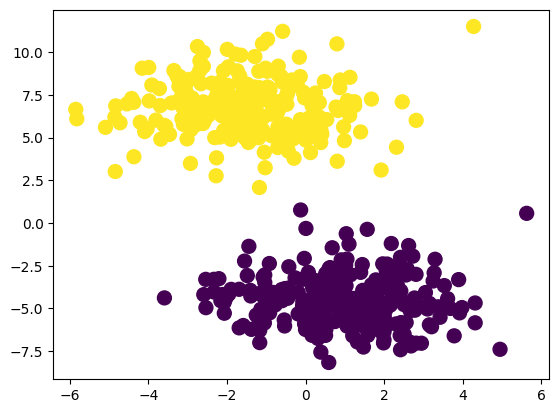

In [2]:
import numpy as np
from numpy import *
def H(p,n):
    h = 0

    if(p!=0 & n!=0):
        p1 = p/(p+n)
        n1 = n/(p+n)
        h = -(p1*np.log2(p1) + n1*np.log2(n1))
    elif (p==0 & n!=0):
        n1 = n/(p+n)
        h = -n1*np.log2(n1)
    elif(p!=0 & n==0):
        p1 = p/(p+n)
        h = -p1*np.log2(p1)
    return h

from sklearn.datasets import make_blobs
X, Y =make_blobs(n_samples=500, centers=2, n_features=2, random_state=100,cluster_std=1.5)
#X = np.array([[1,1],[2,1.5],[3,1],[4,0.7]])
#Y = np.array([1,1,0,0])
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=Y,s=100)
total = 4
p=2
n=2


E_root = H(2,2)
#print(E_root)
P_X = np.squeeze(X[np.where(Y==1),:])
N_X = np.squeeze(X[np.where(Y==0),:])

#print(P_X)
LP = P_X.shape[0]
LN = N_X.shape[0]
#print(LP)

IG_List = []
thr = []
IG_List2 = []
thr2 = []

In [3]:
for k in np.linspace(X.min(),X.max(),40):

    x1 = k
    pos_g = 0
    neg_g = 0
    pos_l = 0
    neg_l = 0
    for i in range(P_X.shape[0]):
        if((P_X[i,0]>x1)):
            pos_g += 1
    for i in range(N_X.shape[0]):
        if((N_X[i,0]>x1)):
            neg_l+=1
    for i in range(P_X.shape[0]):
        if((P_X[i,1]<x2)):
            pos_l +=1
    for i in range(N_X.shape[0]):
        if((N_X[i,1]<x2)):
            neg_l +=1
    #print(pos_g, neg_g)
    #print(pos_l,neg_l)

    PplusN = pos_g+neg_g+pos_l+neg_l

    IG = E_root - ((pos_g+neg_g)/(PplusN) * H(pos_g, neg_g) + (pos_l+neg_l)/(PplusN) * H(pos_l, neg_l))
    #print(IG)
    IG_List.append(IG)
    thr.append(x1)

    #*********************************
    x2 = k
    pos_g = 0 #positive value greater than
    neg_g = 0
    pos_l = 0
    neg_l = 0
    for i in range(P_X.shape[0]):
        if((P_X[i,1]>x2)):
            pos_g +=1
    for i in range(N_X.shape[0]):
        if((N_X[i,1]>x2)):
            neg_g +=1
    for i in range(P_X.shape[0]):
        if((P_X[i,1]<x2)):
            pos_l +=1
    for i in range(N_X.shape[0]):
        if((N_X[i,1]<x2)):
            neg_l +=1
    #print(pos_g, neg_g)
    #print(pos_l, neg_l)

    PplusN = pos_g + neg_g + pos_l + neg_l
    IG2 = E_root - ((pos_g+neg_g) / (PplusN) * H(pos_g, neg_g) + (pos_l+neg_l) / (PplusN) * H(pos_l, neg_l))
    #print(IG)
    IG_List2.append(IG2)
    thr2.append(x2)
    #*****************************************


if(max(IG_List)>max(IG_List2)):
    index = IG_List.index(max(IG_List))
    val = thr[index]
    print(thr[index])
    y = np.linspace(X[:,1].min()-1,X[:,1].max()+1,40)
    x = thr[index] * np.ones(40)
    plt.plot(x,y,'.r',ms=5)
    plot_decision_boundary(val,IG_List,IG_List2)
else:
    index = IG_List2.index(max(IG_List2))
    val = thr2[index]
    print(thr2[index])
    y = np.linspace(X[:,0].min()-1,X[:,0].max()+1,40)
    x = thr2[index] * np.ones(40)
    plt.plot(x,y,'.r',ms=5)
    plot_decision_boundary(val,IG_List,IG_List2)


print(index)

NameError: ignored

In [ ]:
X, Y=make_blobs(n_samples=500,centers=2,n_features=2,\
               random_state=100,cluster_std=1.5)
from sklearn.tree import DecisionTreeClassifier
dt_entropy=DecisionTreeClassifier(max_depth=4,criterion='entropy',random_state=1)
dt_entropy.fit(X,Y)
from mlxtend.plotting import plot_decision_regions
fig,ax=ply.subplots(figsize=(6,4))
plot_decision_regions(X,Y,clf=dt_entropy)
plt.tighrt_layout()
plt.show()

ModuleNotFoundError: No module named 'mlxtend'